In [6]:
import numpy as np
import pandas as pd


In [11]:
df = pd.read_csv('spam.csv',encoding='Windows-1252')

In [12]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Cleaning

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [17]:
# as we see there are last 3 columns with very low values almost null values so we will drop these colmns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [18]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df.rename(columns={'v1':'Target','v2': 'Text'}, inplace=True)

In [20]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [26]:
df['Target']=encoder.fit_transform(df['Target'])
# converting the target values into numeric values

In [27]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
# missing Values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [31]:
# Duplictes Values
df.duplicated().sum()

403

In [34]:
#remove the duplicted values
df= df.drop_duplicates(keep='first')

In [37]:
df.head()
df.shape

(5169, 2)

# EDA

In [38]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [39]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

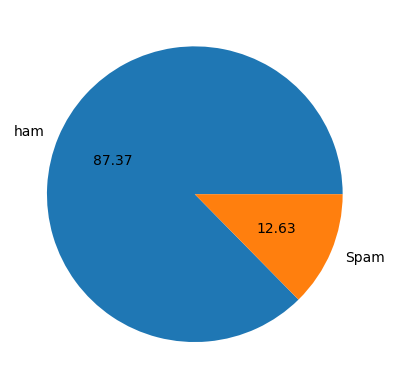

In [40]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['ham','Spam'],autopct="%0.2f")
plt.show()

In [41]:
import nltk

In [42]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [44]:
df['num_character']=df['Text'].apply(len)

In [45]:
df.head()

,Target,Text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: xlabel='num_character', ylabel='Count'>

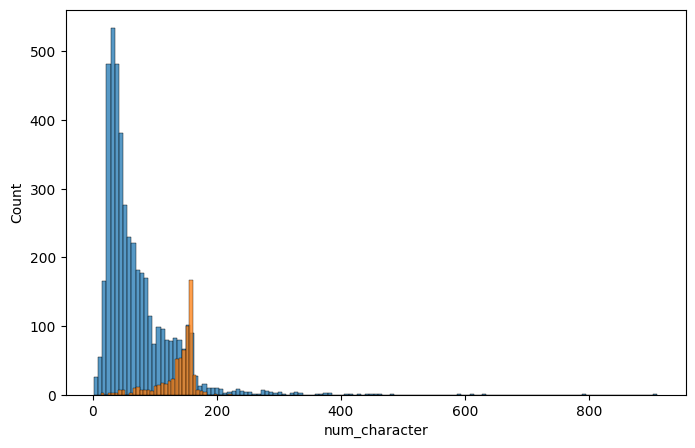

In [51]:
import seaborn as sns
plt.figure(figsize= (8,5))
sns.histplot(df[df['Target']==0]['num_character'])
sns.histplot(df[df['Target']==1]['num_character'])

# Data Preprocessing
lower case\n
tokenization(seperating one by one)
removing special character
removing stop words and punctuation
stemming( eg: loving-> love etc)

In [52]:
# lower case\n
# tokenization(seperating one by one)
# removing special character
#  removing stop words and punctuation
# stemming( eg: loving-> love etc)

In [87]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
ps = PorterStemmer()
import string

In [88]:
def trans(Text):
    Text=Text.lower()
    Text= nltk.word_tokenize(Text)

    y = []
    for i in Text:
        if i.isalnum():
           y.append(i)
    Text=y[:]
    y.clear()

    for i in Text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    Text=y[:]  
    y.clear()


    for i in Text:
        y.append(ps.stem(i))


    return " ".join(y)

In [89]:
trans("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cr")

'gon na home soon want talk stuff anymor tonight k cr'

In [83]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [90]:
df['Trans_text']= df['Text'].apply(trans)

In [91]:
df.head()

,Target,Text,num_character,Trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


In [93]:
!pip install wordcloud


In [94]:
from wordcloud import WordCloud
wc=WordCloud(height=500, width=500, min_font_size=10, background_color='white')

In [96]:
spam=wc.generate(df[df['Target']==1]['Trans_text'].str.cat(sep=" "))

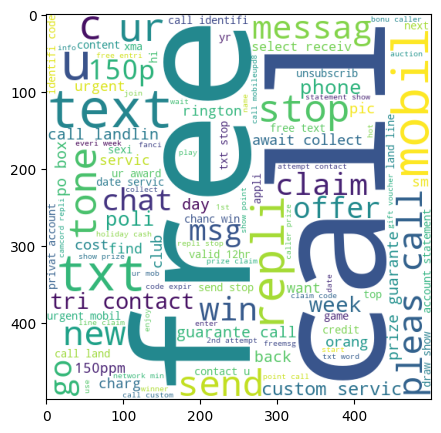

In [99]:
plt.figure(figsize=(10,5))
plt.imshow(spam)

In [100]:
ham=wc.generate(df[df['Target']==0]['Trans_text'].str.cat(sep=" "))

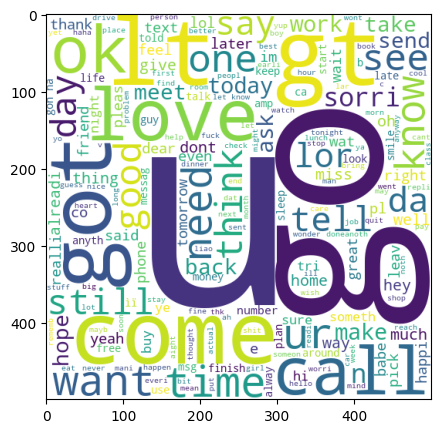

In [101]:
plt.figure(figsize=(10,5))
plt.imshow(ham)

# Model Building

In [102]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# use any one method 
cv=CountVectorizer()
TF=TfidfVectorizer()

In [125]:
X=cv.fit_transform(df['Trans_text']).toarray()

In [135]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [126]:
y= df['Target']

In [127]:

from sklearn.model_selection import train_test_split


In [128]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)


In [129]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score
MN=MultinomialNB()
GN=GaussianNB()
BN=BernoulliNB()

In [130]:
MN.fit(X_train, y_train)
y_pred=MN.predict(X_test)
print("Accuracy_score=",accuracy_score(y_pred, y_test))
print("Precision_score=",precision_score(y_pred, y_test))

Accuracy_score= 0.9642166344294004
Precision_score= 0.9130434782608695


In [131]:
# Applying Second Algorithum
GN.fit(X_train, y_train)
y_pred2=GN.predict(X_test)
print("Accuracy_score=",accuracy_score(y_pred2, y_test))
print("Precision_score=",precision_score(y_pred2, y_test))

Accuracy_score= 0.8800773694390716
Precision_score= 0.855072463768116


In [132]:
# Applying Third Algorithm
BN.fit(X_train, y_train)
y_pred3=BN.predict(X_test)
print("Accuracy_score=",accuracy_score(y_pred3, y_test))
print("Precision_score=",precision_score(y_pred3, y_test))

Accuracy_score= 0.9700193423597679
Precision_score= 0.7971014492753623


# Selection of Model

In [133]:
# So in the above models we are taking MN (Multinomial NB ) Because of its highest precision Rate as it is unbalnaced data so we fll more focus on 
# Precision Score as well accuracy score.

In [134]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(MN,open('model.pkl','wb'))